In [1]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import backend as K
from tensorflow.keras.layers import add, Conv2D, MaxPooling2D, UpSampling2D, Input, BatchNormalization, RepeatVector, Reshape
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
set_random_seed(42)

In [2]:
from tensorflow.keras.models import load_model
model = load_model('./model_enhancer.h5')

In [3]:
model

In [16]:
def ExtractTestInput(ImagePath):
    img = cv.imread(ImagePath)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_ = cv.resize(img, (500, 500))
    hsv = cv.cvtColor(img_, cv.COLOR_BGR2HSV)  # Convert to HSV
    img1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)  # Convert back to BGR
    img1 = img1.reshape(1, 500, 500, 3)
    return img1


In [17]:
ImagePath='./pexels-vladbagacian-1368382.jpg'
image_for_test = ExtractTestInput(ImagePath)
Prediction = model.predict(image_for_test)

1/1 [==============================] - 0s 173ms/step


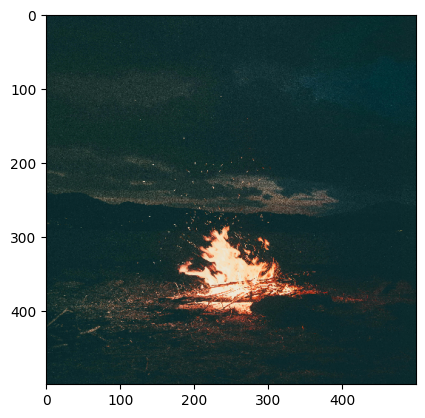

In [18]:
plt.imshow(image_for_test.reshape(500,500,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1369.509].


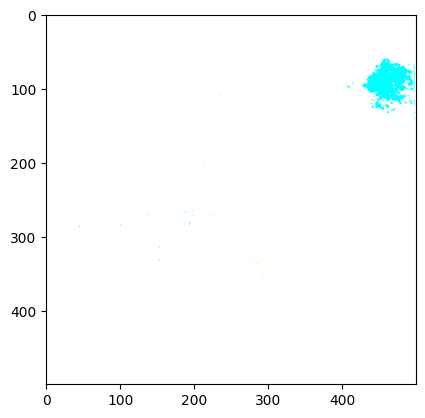

In [19]:
Prediction = Prediction.reshape(500,500,3)
plt.imshow(Prediction)